In [1]:
### For the Kaggle notebook only ###

import sys 
import os

module_directory = "/kaggle/input/m2mo-dl/Projet"

# Add the directory to sys.path
if module_directory not in sys.path:
    sys.path.append(module_directory)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


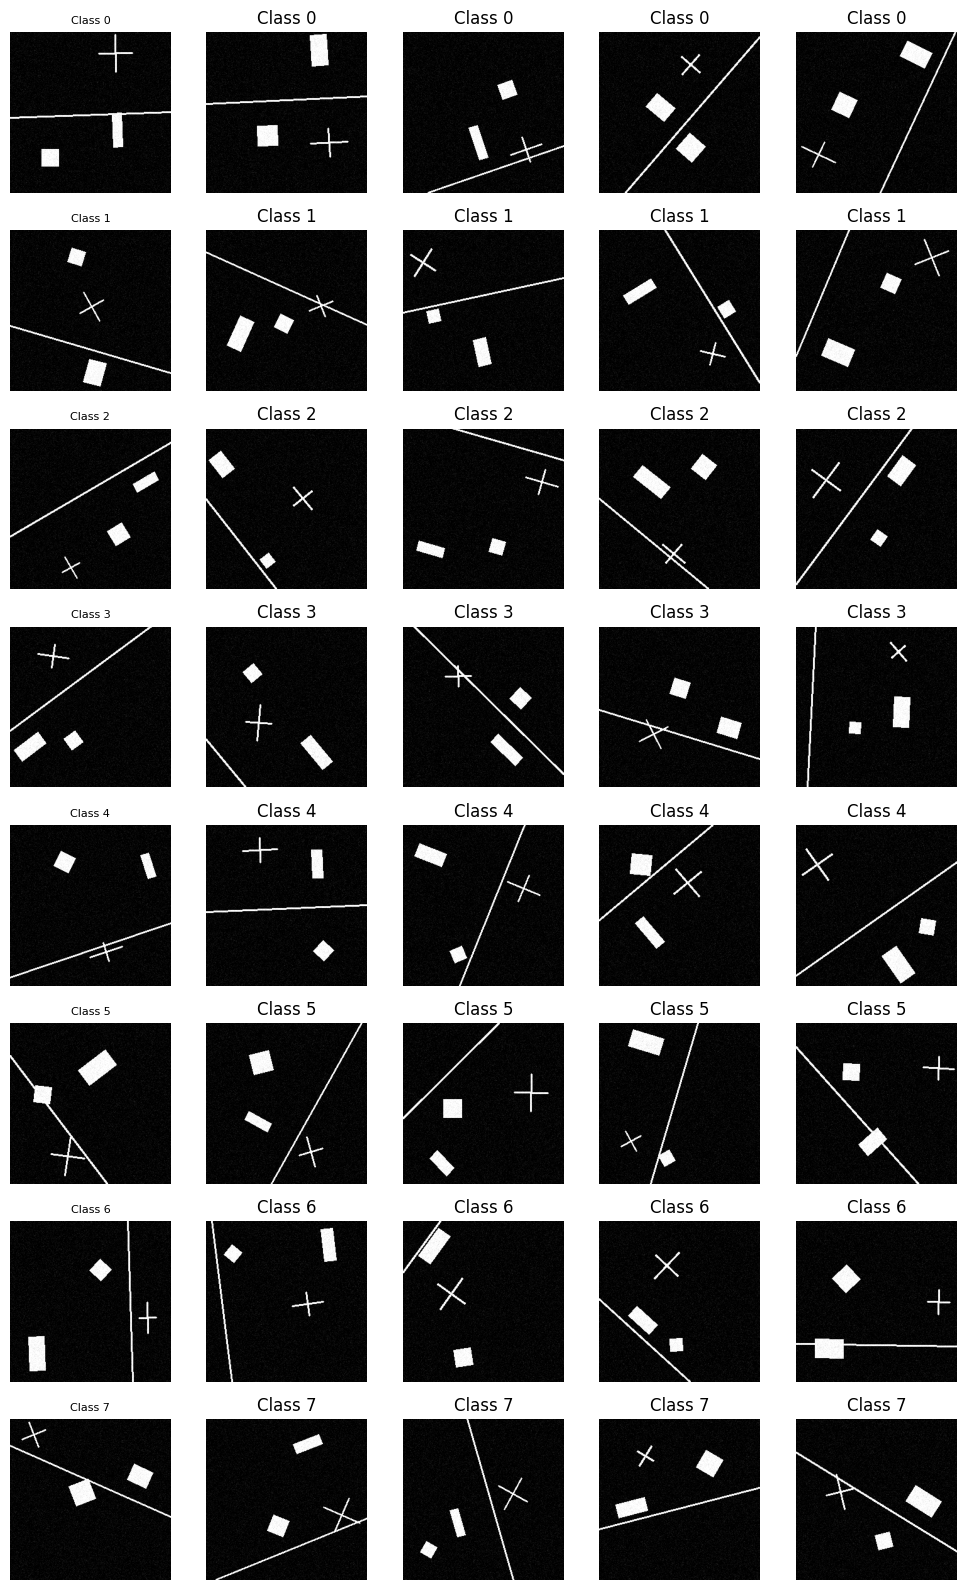

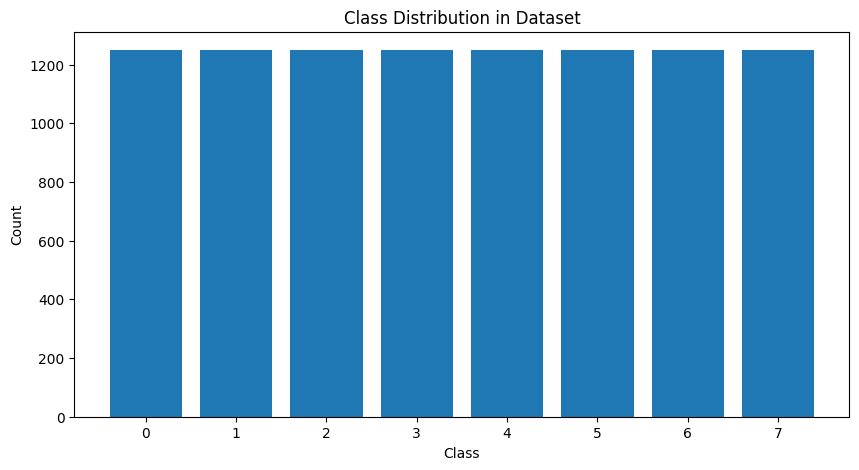

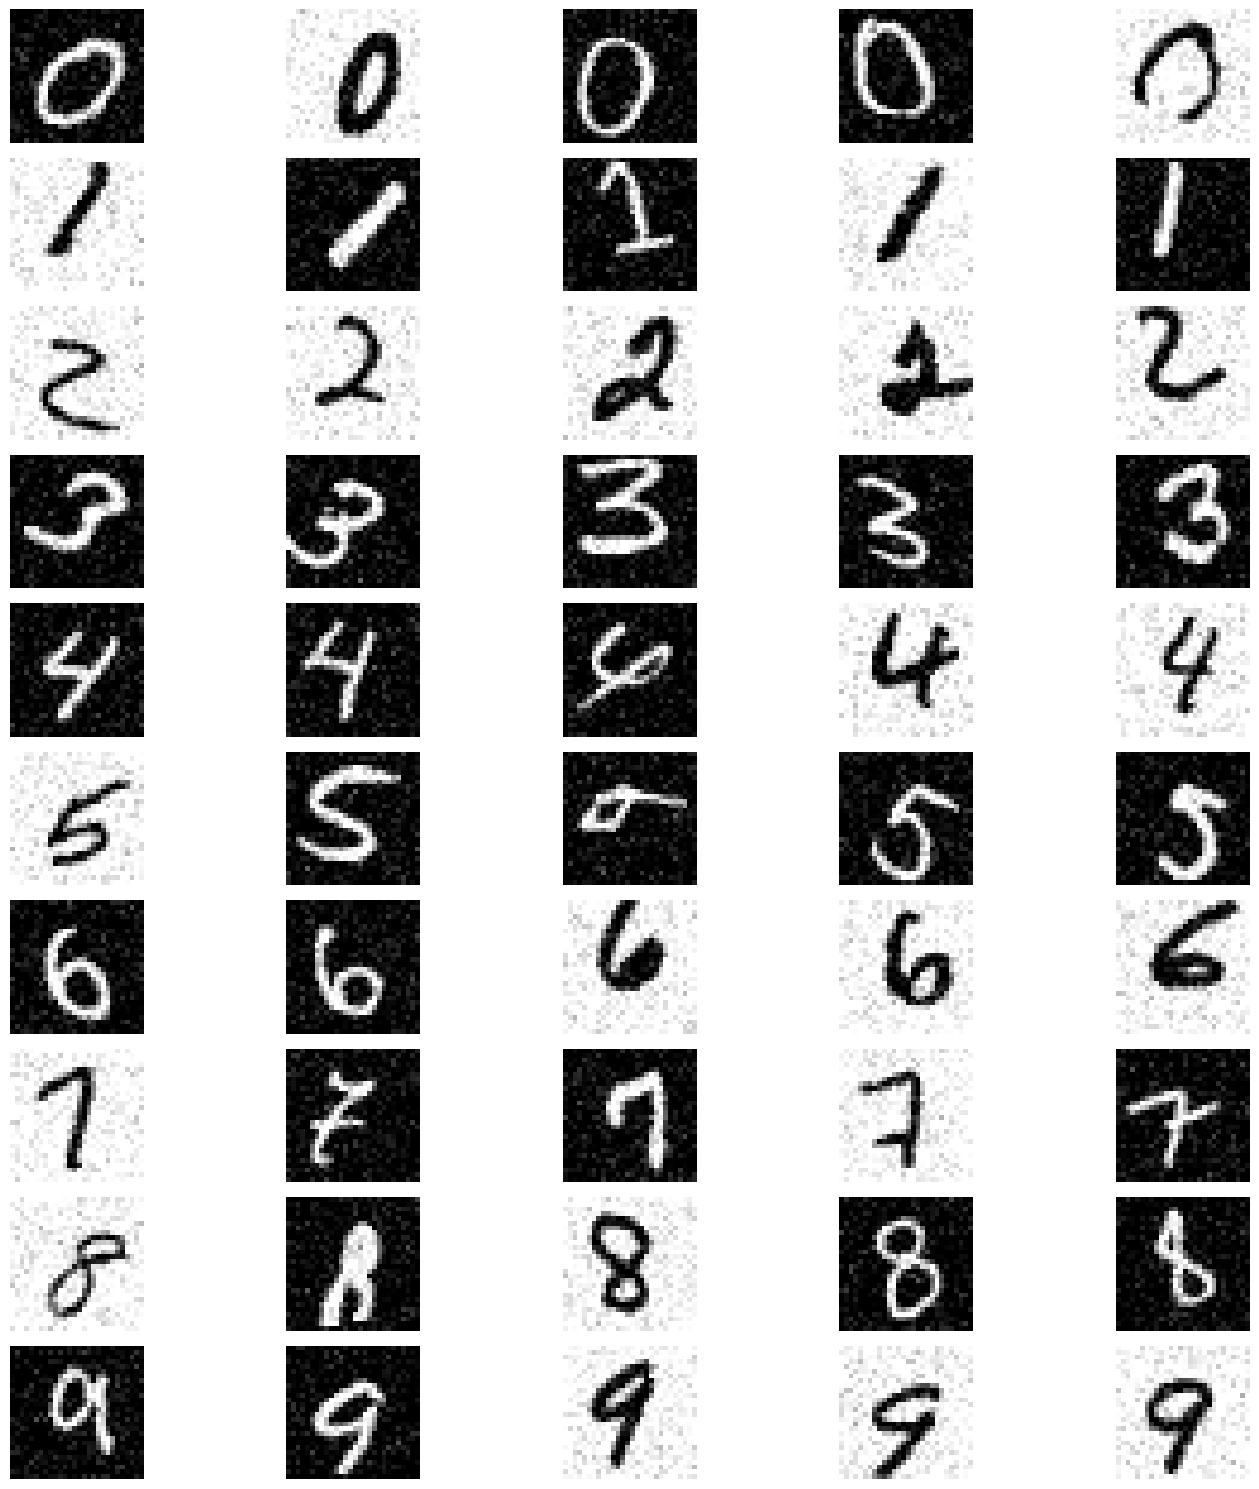

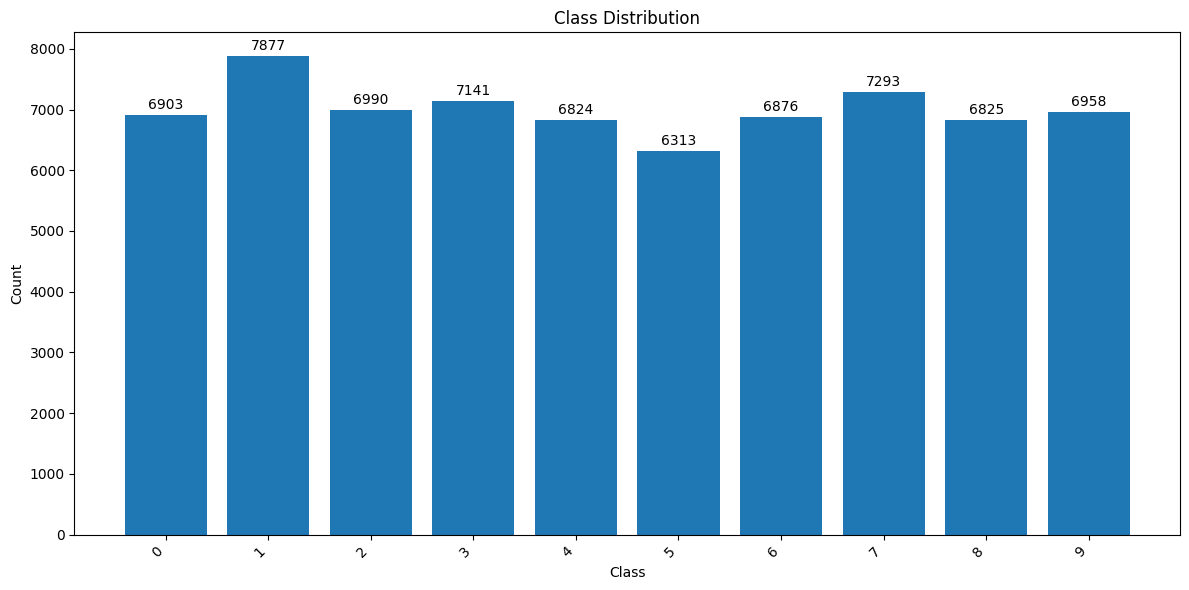

In [ ]:
# In your Model_comparison.ipynb
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import gc

# Import datasets
from data.relational_dataset import RelationalDataset
from data.mnist_dataset import MNISTDataset
from data.dataset_utils import create_tf_datasets, visualize_dataset_examples, plot_class_distribution

# Import models
from models.cnn_model import CNN
from models.vit_model import VisionTransformer 
from models.model_trainer import ModelTrainer

# Import evaluation utilities
from utils.evaluation import ModelEvaluator
from utils.visualization import plot_sample_images, plot_model_examples

# Create datasets
relational_dataset = RelationalDataset(num_samples=30000, img_size=64)
mnist_dataset = MNISTDataset()

# Visualize datasets
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)
visualize_dataset_examples(mnist_dataset, "MNIST Dataset Examples")
plot_class_distribution(mnist_dataset)

# Create TensorFlow datasets
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=128)
mnist_train_loader, mnist_test_loader = create_tf_datasets(mnist_dataset, batch_size=128)

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# MNIST Models Training Section

# Initialize CNN model for MNIST
mnist_cnn_model = CNN(
    num_classes=10,  # MNIST has 10 classes (digits 0-9)
    in_channels=1,   # Grayscale images
    img_size=28,     # MNIST images are 28x28
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
mnist_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset
mnist_cnn_trainer = ModelTrainer(mnist_cnn_model, mnist_train_loader, mnist_test_loader, model_name="CNN on MNIST")

# Train the model
print("Training CNN on MNIST Dataset...")
mnist_cnn_trainer.train(epochs=100, early_stopping=False)

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for MNIST
mnist_vit_model = VisionTransformer(
    patch_size=7,
    image_size=28,
    embedding_dim=64,
    num_heads=4,
    num_classes=10,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

mnist_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for MNIST dataset with ViT
mnist_vit_trainer = ModelTrainer(mnist_vit_model, mnist_train_loader, mnist_test_loader, model_name="ViT on MNIST")

# Train the model
print("Training ViT on MNIST Dataset...")
mnist_vit_trainer.train(epochs=100, early_stopping=False)

In [ ]:
# Create class names for MNIST dataset
mnist_class_names = [str(i) for i in range(10)]  # 0-9 for MNIST

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN': mnist_cnn_trainer,
        'ViT': mnist_vit_trainer
    },
    test_dataset=mnist_test_loader,
    class_names=mnist_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

# Plot confusion matrices
evaluator.plot_confusion_matrices()

# Print detailed classification reports
evaluator.print_classification_reports()

# Visualize attention maps for ViT model
evaluator.visualize_attention_maps('ViT')

# Optionally show some example predictions
plot_model_examples(mnist_vit_trainer.model, mnist_test_loader, class_names=mnist_class_names)

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section

# Initialize CNN model for Relational Dataset
rel_cnn_model = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
rel_cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational dataset
rel_cnn_trainer = ModelTrainer(rel_cnn_model, rel_train_loader, rel_test_loader, model_name="CNN on Relational Dataset")

# Train the model
print("Training CNN on Relational Dataset...")
rel_cnn_trainer.train(epochs=100, early_stopping=False)
rel_cnn_trainer.evaluate()
rel_cnn_trainer.plot_training_history()

# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Initialize Vision Transformer for Relational Dataset
rel_vit_model = VisionTransformer(
    patch_size=7,
    image_size=64,
    embedding_dim=64,
    num_heads=4,
    num_classes=8,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

rel_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset dataset with ViT
rel_vit_trainer = ModelTrainer(rel_vit_model, rel_train_loader, rel_test_loader, model_name="ViT on Relational Dataset")

# Train the model
print("Training ViT on Relational Dataset...")
rel_vit_trainer.train(epochs=100, early_stopping=False)
rel_vit_trainer.evaluate()
rel_vit_trainer.plot_training_history()

In [ ]:
# Create class names for MNIST dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN': rel_cnn_trainer,
        'ViT': rel_vit_trainer
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

# Plot confusion matrices
evaluator.plot_confusion_matrices()

# Print detailed classification reports
evaluator.print_classification_reports()

# Visualize attention maps for ViT model
evaluator.visualize_attention_maps('ViT')

# Optionally show some example predictions
plot_model_examples(rel_vit_trainer.model, rel_test_loader, class_names=rel_class_names)

Training CNN on Relational Dataset...
Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 261ms/step - accuracy: 0.1356 - loss: 3.1539 - val_accuracy: 0.1240 - val_loss: 2.2373
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.1283 - loss: 2.2080 - val_accuracy: 0.1240 - val_loss: 2.1247
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.1302 - loss: 2.1300 - val_accuracy: 0.1275 - val_loss: 2.0887
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.1323 - loss: 2.1142 - val_accuracy: 0.1050 - val_loss: 2.0862
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.1397 - loss: 2.1145 - val_accuracy: 0.1365 - val_loss: 2.0867
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.1403 - loss: 2.1075 - val_accuracy: 0.1280 - val_loss: 2.0952
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.1403 - loss: 2.0998 - val_accuracy: 0.1075 - val_loss: 2.0938
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 

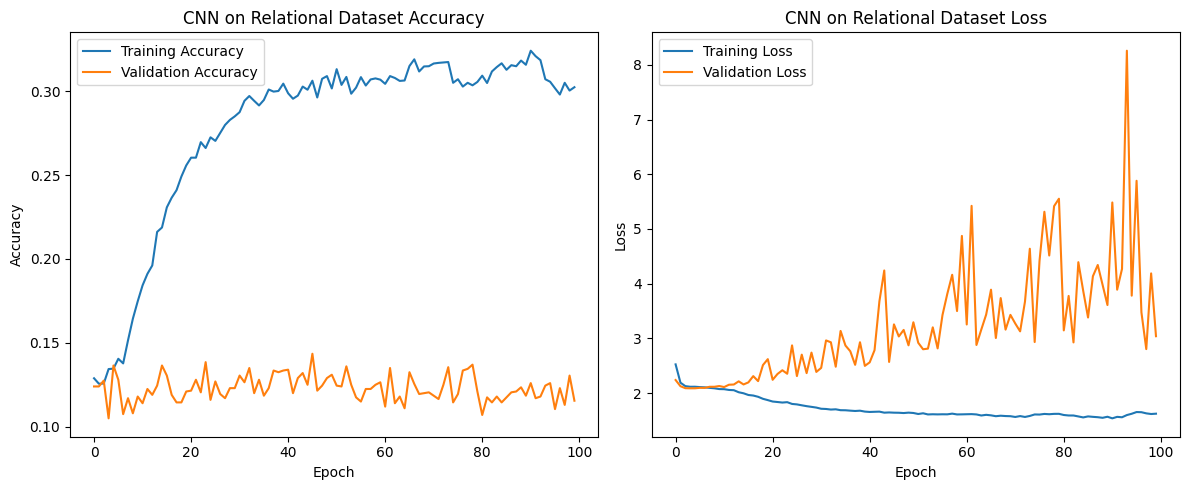

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section - 4 Layers
# Initialize CNN model for Relational Dataset with 4 layers
rel_cnn_model_4_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=4
)

# Compile the model
rel_cnn_model_4_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 4 layers
rel_cnn_trainer_4_layers = ModelTrainer(rel_cnn_model_4_layers, rel_train_loader, rel_test_loader, model_name="CNN (4 layers) on Relational Dataset")

# Train the model
print("Training CNN with 4 layers on Relational Dataset...")
rel_cnn_trainer_4_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 5 layers
rel_cnn_model_5_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes (digits 0-7)
    in_channels=1,   # Grayscale images
    img_size=64,     # Relational Dataset images are 64x64
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=5
)

# Compile the model
rel_cnn_model_5_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 5 layers
rel_cnn_trainer_5_layers = ModelTrainer(rel_cnn_model_5_layers, rel_train_loader, rel_test_loader, model_name="CNN (5 layers) on Relational Dataset")

# Train the model
print("Training CNN with 5 layers on Relational Dataset...")
rel_cnn_trainer_5_layers.train(epochs=100, early_stopping=False)

In [ ]:
# Create class names for MNIST dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'CNN_3_layers': rel_cnn_trainer,
        'CNN_4_layers': rel_cnn_trainer_4_layers,
        'CNN_5_layers': rel_cnn_trainer_5_layers
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()

In [ ]:
# Create dataset
relational_dataset = RelationalDataset(num_samples=10000, img_size=256)

# Visualize dataset
visualize_dataset_examples(relational_dataset, "Relational Dataset Examples")
plot_class_distribution(relational_dataset)

# Create TensorFlow dataset
rel_train_loader, rel_test_loader = create_tf_datasets(relational_dataset, batch_size=128)

In [ ]:
# Reset TensorFlow session
tf.keras.backend.clear_session()
gc.collect()

# Relational Dataset Models Training Section for 256x256 images

# Initialize Vision Transformer for Relational Dataset
rel_vit_model = VisionTransformer(
    patch_size=7,
    image_size=256,
    embedding_dim=64,
    num_heads=4,
    num_classes=8,
    in_channels=1,
    dropout_rate=0.2,
    num_blocks=2
)

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=5e-4, weight_decay=1e-4)

rel_vit_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset dataset with ViT
rel_vit_trainer = ModelTrainer(rel_vit_model, rel_train_loader, rel_test_loader, model_name="ViT on Relational Dataset")

# Train the model
print("Training ViT on Relational Dataset...")
rel_vit_trainer.train(epochs=100, early_stopping=False)


# Initialize CNN model for Relational Dataset with 3 layers
rel_cnn_model_3_layers = CNN(
    num_classes=8,  # Relational Dataset has 8 classes
    in_channels=1,  # Grayscale images
    img_size=256,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=3
)

# Compile the model
rel_cnn_model_3_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 3 layers
rel_cnn_trainer_3_layers = ModelTrainer(rel_cnn_model_3_layers, rel_train_loader, rel_test_loader, model_name="CNN (3 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 3 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_3_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 4 layers
rel_cnn_model_4_layers = CNN(
    num_classes=8, 
    in_channels=1,  
    img_size=256,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=4
)

# Compile the model
rel_cnn_model_4_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 4 layers
rel_cnn_trainer_4_layers = ModelTrainer(rel_cnn_model_4_layers, rel_train_loader, rel_test_loader, model_name="CNN (4 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 4 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_4_layers.train(epochs=100, early_stopping=False)

# Reset TensorFlow session for the next model
tf.keras.backend.clear_session()
gc.collect()

# Initialize CNN model for Relational Dataset with 5 layers
rel_cnn_model_5_layers = CNN(
    num_classes=8,
    in_channels=1,
    img_size=256,   # Using the 256x256 images
    kernel_size=3,
    first_filters=16,
    filters_multiplier=2,
    dense_neurons=64,
    dropout_rate=0.2,
    num_layers=5
)

# Compile the model
rel_cnn_model_5_layers.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Create trainer for Relational Dataset with 5 layers
rel_cnn_trainer_5_layers = ModelTrainer(rel_cnn_model_5_layers, rel_train_loader, rel_test_loader, model_name="CNN (5 layers) on 256x256 Relational Dataset")

# Train the model
print("Training CNN with 5 layers on 256x256 Relational Dataset...")
rel_cnn_trainer_5_layers.train(epochs=100, early_stopping=False)

In [ ]:
# Create class names for Relational dataset
rel_class_names = [str(i) for i in range(8)]  # 0-7 for Relational Dataset

# Create evaluator with both models
evaluator = ModelEvaluator(
    model_trainers={
        'ViT': rel_vit_trainer,
        'CNN_3_layers': rel_cnn_trainer,
        'CNN_4_layers': rel_cnn_trainer_4_layers,
        'CNN_5_layers': rel_cnn_trainer_5_layers
    },
    test_dataset=rel_test_loader,
    class_names=rel_class_names
)

# Run all evaluations
evaluator.evaluate_all()

# Compare training histories
evaluator.compare_training_history()